<a href="https://colab.research.google.com/github/johnsl01/income2/blob/master/loadtest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
todo = "deal with non numeric columns amd the missing data "

print (todo)

print ('drive access')

from google.colab import drive
# drive.mount('/content/gdrive')
!ls '/content/gdrive/My Drive/income'

In [0]:
print ('imports')

from datetime import datetime as dt

from __future__ import print_function

import math

from math import sqrt

from IPython import display

import pandas as pd

import numpy as np

# import sklearn as skl
from sklearn import linear_model
from sklearn import neural_network as nnet
from sklearn import svm
from sklearn import ensemble
from sklearn import metrics

from sklearn.ensemble import IsolationForest

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

# include the TensorFlow libraries 
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

# plotting utilities
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as a3d

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam 

print(dt.now())

In [0]:
print(dt.now())

In [0]:
print ('data loads')

print ("train")
print(dt.now())
training_path = "/content/gdrive/My Drive/income/tcd-ml-1920-group-income-train.csv"
# print ("nrows set to 100")
# train_df = pd.read_csv(training_path, nrows=10000)
train_df = pd.read_csv(training_path)

print ("test")
print(dt.now())
test_path = "/content/gdrive/My Drive/income/tcd-ml-1920-group-income-test.csv"
# test_df = pd.read_csv(test_path, nrows=10000)
test_df = pd.read_csv(test_path)

print(dt.now())

In [0]:
print (train_df.shape)
print (test_df.shape)

print(dt.now())

In [0]:
print (train_df.columns)
print (test_df.columns)

In [0]:
###############################################
#@title           Column Renames              #
###############################################


# dont like the col names - much easier with simple strings with no spaces.
train_df.rename(columns = {"Year of Record" : "Year",
                           "Housing Situation" : "Housing",
                           "Crime Level in the City of Employement" : "CrimeLevel",
                           "Work Experience in Current Job [years]" : "WorkExp",
                           "Satisfation with employer" : "Satisfaction",
                           "Size of City" : "CitySize",
                           "University Degree" : "Degree",
                           "Wears Glasses" : "Glasses",
                           "Hair Color" : "Hair",
                           "Body Height [cm]" : "Height",
                           "Yearly Income in addition to Salary (e.g. Rental Income)" : "AdditionalIncome",
                           "Total Yearly Income [EUR]" : "Income"},
                  inplace = True)

test_df.rename( columns = {"Year of Record" : "Year",
                           "Housing Situation" : "Housing",
                           "Crime Level in the City of Employement" : "CrimeLevel",
                           "Work Experience in Current Job [years]" : "WorkExp",
                           "Satisfation with employer" : "Satisfaction",
                           "Size of City" : "CitySize",
                           "University Degree" : "Degree",
                           "Wears Glasses" : "Glasses",
                           "Hair Color" : "Hair",
                           "Body Height [cm]" : "Height",
                           "Yearly Income in addition to Salary (e.g. Rental Income)" : "AdditionalIncome",
                           "Total Yearly Income [EUR]" : "Income"},
                  inplace = True)

In [0]:
print (train_df.columns)
print (test_df.columns)

In [0]:
print(train_df.head())

In [0]:
train_df.describe()
train_df[["Instance", "Year", "CrimeLevel", "Age", "CitySize", "Glasses", "Height", "Income"]].describe()

In [0]:
train_df[['Satisfaction','Gender','Country','Profession','Degree','Hair','AdditionalIncome']].describe()

In [0]:
train_df[['WorkExp']].describe()

In [0]:
train_df[['Housing']].describe()

In [0]:
print('checking pearson and spearman corellations') 

from scipy.stats import pearsonr
from scipy.stats import spearmanr

x = np.array([1,2,3,4,5])
y0 = np.array([1,1.4,1.7,2,2.1]) # aproximate roots
y1 = np.array([2,4.2,6,7,10]) # aproximately linear
y2 = np.array([0.9,4.1, 9.5, 17, 27]) # aproximate squares
y3 = np.array([0.9,8.1, 27.5, 68, 133]) # aproximate cubes

print (pearsonr(x,y0), spearmanr(x,y0))
print (pearsonr(x,y1), spearmanr(x,y1))
print (pearsonr(x,y2), spearmanr(x,y2))
print (pearsonr(x,y3), spearmanr(x,y3))

In [0]:
print ("run pearson and spearman analysis for our full numeric columns against the income result")
print ("pearson test for linear correlation - spearman for monotonic corelation (which may not be linear) \n")

# 'Instance', 'Year', 'Housing', 'CrimeLevel', 'WorkExp', 'Satisfaction',
# 'Gender', 'Age', 'Country', 'CitySize', 'Profession', 'Degree',
# 'Glasses', 'Hair', 'Height', 'AdditionalIncome', 'Income'

print (" 0 Instance : ",
       pearsonr(train_df[ 'Instance'], train_df['Income']),
       spearmanr(train_df[ 'Instance'], train_df['Income']),
       "  -  quite a high, but somewhat non linear corelation. Why ? \n")

print (" 1 Year has missing data. \n")
# print ("Year : ", pearsonr(train_df[ 'Year'], train_df['Income']))

print (" 2 Housing is categorical incl some numerical. \n")

print (" 3 CrimeLevel : ",
       pearsonr(train_df[ 'CrimeLevel'], train_df['Income']),
       spearmanr(train_df[ 'CrimeLevel'], train_df['Income']),
       "  -  Very little corelation. \n")

print (" 4 Age: ",
       pearsonr(train_df[ 'Age'], train_df['Income']),
       spearmanr(train_df[ 'Age'], train_df['Income']),
       "  -  Very little corelation. \n")

print (" 5 WorkExp is categorical incl some numerical. \n")

print (" 6 Satisfaction is categorical. \n")

print (" 7 Gender is categorical. \n")

print (" 8 Country is categorical. \n")

print (" 9 CitySize : ",
       pearsonr(train_df[ 'CitySize'], train_df['Income']),
       spearmanr(train_df[ 'CitySize'], train_df['Income']),
       "  -  Slight correlation - but not linear. \n")

print ("10 Profession is categorical. \n")

print ("11 Degree is categorical. \n")

print ("12 Glasses : ",
       pearsonr(train_df[ 'Glasses'], train_df['Income']),
       spearmanr(train_df[ 'Glasses'], train_df['Income']),
       "  -  No correlation - drop the column it's just noise. \n")

print ("13 Hair is categorical. \n")

print ("14 Height : ",
       pearsonr(train_df[ 'Height'], train_df['Income']),
       spearmanr(train_df[ 'Height'], train_df['Income']),
       "  -  Almost no correlation - drop the column it's just noise. \n")

print ("15 AdditionalIncome is categorical incl some numerical. \n")

print ("16 Income : ",
       pearsonr(train_df[ 'Income'], train_df['Income']),
       spearmanr(train_df[ 'Income'], train_df['Income']),
       "  -  perfect correlation - just to test - it had better be! \n")

In [0]:
print (" --------  Instance  -------")
# Instance 
# encode as a scaled value 
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.Instance.max(), test_df.Instance.max())
maxInstance = max(train_df.Instance.max(), test_df.Instance.max())
print ("    ", maxInstance) 

print ("  min : ")
print ("    ",train_df.Instance.min(), test_df.Instance.min())
minInstance = min(train_df.Instance.min(), test_df.Instance.min())
print ("    ", minInstance)

rangeInstance = maxInstance - minInstance
train_df.loc[:, 'InstanceEnc'] = (train_df['Instance']-minInstance) / rangeInstance

test_df.loc[:, 'InstanceEnc'] = (test_df['Instance']-minInstance) / rangeInstance

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.InstanceEnc.max(), test_df.InstanceEnc.max())
maxInstanceEnc = max(train_df.InstanceEnc.max(), test_df.InstanceEnc.max())
print ("    ", maxInstanceEnc) 

print ("  min : ")
print ("    ",train_df.InstanceEnc.min(), test_df.InstanceEnc.min())
minInstanceEnc = min(train_df.InstanceEnc.min(), test_df.InstanceEnc.min())
print ("    ", minInstanceEnc)

print (" 0 Instance : ",
       pearsonr(train_df[ 'InstanceEnc'], train_df['Income']),
       spearmanr(train_df[ 'InstanceEnc'], train_df['Income']),
       "  -  quite a high, but somewhat non linear corelation. Why ? \n")





In [0]:
# so go through the remaining columns - decide what to do with them 
# and then test the correlation between the treated value and the income



In [0]:
# Year 
print (" --------  Year  -------\n")

# missing data but otherwise numeric between 1940 and 2019 

# lets fill with an out of range value and chart it 
# then look at teh charts and correlations and decide on a strategy 

# done - fill with rounded mean 1979.0 (1979)

train_df.Year.fillna(1979.0, inplace=True)

print ( train_df['Year'].describe() )


In [0]:
test_df['Year'].describe()

In [0]:
test_df.Year.fillna(1979.0, inplace=True)

test_df['Year'].describe()

In [0]:
# train_df['Year'].hist(bins=80)

In [0]:
print (" 1 Year : ",
       pearsonr(train_df[ 'Year'], train_df['Income']),
       spearmanr(train_df[ 'Year'], train_df['Income']),
       "  -  Good correlation - almost the same as Instance - slightly non linear. \n")

# 1 Year :  (0.6310504764919517, 0.0) SpearmanrResult(correlation=0.8495098504454566, pvalue=0.0) - 1939 fillna
# 1 Year :  (0.6317759175887114, 0.0) SpearmanrResult(correlation=0.8503274082842994, pvalue=0.0) - 2020 fillna
# 1 Year :  (0.6353301585949168, 0.0) SpearmanrResult(correlation=0.854775189253737,  pvalue=0.0) - 1979.0 fillna ==> use this 

In [0]:
# encode as a scaled value : 

# Instance 
# encode as a scaled value 
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.Year.max(), test_df.Year.max())
maxYear = max(train_df.Year.max(), test_df.Year.max())
print ("    ", maxYear) 

print ("  min : ")
print ("    ",train_df.Year.min(), test_df.Year.min())
minYear = min(train_df.Year.min(), test_df.Year.min())
print ("    ", minYear)

rangeYear = maxYear - minYear
train_df.loc[:, 'YearEnc'] = (train_df['Year']-minYear) / rangeYear

test_df.loc[:, 'YearEnc'] = (test_df['Year']-minYear) / rangeYear

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.YearEnc.max(), test_df.YearEnc.max())
maxYearEnc = max(train_df.YearEnc.max(), test_df.YearEnc.max())
print ("    ", maxYearEnc) 

print ("  min : ")
print ("    ",train_df.YearEnc.min(), test_df.YearEnc.min())
minYearEnc = min(train_df.YearEnc.min(), test_df.YearEnc.min())
print ("    ", minYearEnc)

print (" 0 Instance : ",
       pearsonr(train_df[ 'YearEnc'], train_df['Income']),
       spearmanr(train_df[ 'YearEnc'], train_df['Income']),
       "  -  quite a high, but somewhat non linear corelation. Why ? \n")



In [0]:
# Housing

print( train_df.Housing.unique() )

print ( test_df.Housing.unique() )

In [0]:
housingcount = 0
print ('train_df')
print ("        mean       std-dev         count    max    min      Housing")

for i in train_df.Housing.unique() :
  print (train_df.loc[train_df.Housing == i].Income.mean(),
         train_df.loc[train_df.Housing == i].Income.std(),
         train_df.loc[train_df.Housing == i].Instance.count(),
         train_df.loc[train_df.Housing == i].Income.max(),
         train_df.loc[train_df.Housing == i].Income.min(),
         " ---- ", i)
  housingcount += train_df.loc[train_df.Housing == i].Instance.count()
print('sum of counts : ', housingcount, "\n")

housingcounttest = 0
print ('test_df')
print ("  count     Housing")
for i in test_df.Housing.unique() :
  print (test_df.loc[test_df.Housing == i].Instance.count(),       
         " ---- ", i)
  housingcounttest += test_df.loc[test_df.Housing == i].Instance.count()
print('sum of counts : ',housingcounttest, "\n")

# use mean encoding - may adjust to a smoothed mean or James-Stein later

#build a map and then use it 
mean_encode = train_df.groupby('Housing')['Income'].mean()
print (mean_encode)

train_df.loc[:, 'HousingEnc1'] = train_df['Housing'].map(mean_encode)

test_df.loc[:, 'HousingEnc1'] = test_df['Housing'].map(mean_encode)

print (train_df.columns)
print (test_df.columns)

print ("\n 17 HousingEnc1 : ",
       pearsonr(train_df[ 'HousingEnc1'], train_df['Income']),
       spearmanr(train_df[ 'HousingEnc1'], train_df['Income']),
       "  -  good correlation - slightly non linear. \n")

In [0]:
# encode as a scaled value : 

# Instance 
# encode as a scaled value 
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.HousingEnc1.max(), test_df.HousingEnc1.max())
maxHousing = max(train_df.HousingEnc1.max(), test_df.HousingEnc1.max())
print ("    ", maxHousing) 

print ("  min : ")
print ("    ",train_df.HousingEnc1.min(), test_df.HousingEnc1.min())
minHousing = min(train_df.HousingEnc1.min(), test_df.HousingEnc1.min())
print ("    ", minHousing)

rangeHousing = maxHousing - minHousing
train_df.loc[:, 'HousingEnc'] = (train_df['HousingEnc1']-minHousing) / rangeHousing

test_df.loc[:, 'HousingEnc'] = (test_df['HousingEnc1']-minHousing) / rangeHousing

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.HousingEnc.max(), test_df.HousingEnc.max())
maxHousingEnc = max(train_df.HousingEnc.max(), test_df.HousingEnc.max())
print ("    ", maxHousingEnc) 

print ("  min : ")
print ("    ",train_df.HousingEnc.min(), test_df.HousingEnc.min())
minHousingEnc = min(train_df.HousingEnc.min(), test_df.HousingEnc.min())
print ("    ", minHousingEnc)

print (" 0 Housing : ",
       pearsonr(train_df[ 'HousingEnc'], train_df['Income']),
       spearmanr(train_df[ 'HousingEnc'], train_df['Income']),
       "  -  quite a high, but somewhat non linear corelation. ? \n")

In [0]:
# WorkExp

print( train_df.WorkExp.unique() )

print ( test_df.WorkExp.unique() )



In [0]:
workexpcount = 0
workexpcounttest = 0 

print (" train contents counts")
print (" train     test      WorkExp")


input= train_df.WorkExp.unique() 
strs = list(filter(lambda x : type(x) ==str,input))
ints = list(filter(lambda x: type(x) == int, input))
floats = list(filter(lambda x: type(x) == float, input))
output = sorted(strs) + sorted(ints) + sorted(floats)


for i in output :
  thiscount = train_df.loc[train_df.WorkExp == i].Instance.count()
  thiscounttest = test_df.loc[test_df.WorkExp == i].Instance.count()
  thismean = train_df.loc[train_df.WorkExp == i].Income.mean()
  thisstd = train_df.loc[train_df.WorkExp == i].Income.std()
  workexpcount += thiscount
  workexpcounttest += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismean, "  ----  ", thisstd )
print("sum of count   train : ", workexpcount, '   test : ', workexpcounttest )

workexpcount2 = 0
workexpcounttest2 = 0 

print (" test contents counts ")
print (" train     test      WorkExp")

input= test_df.WorkExp.unique() 
strs = list(filter(lambda x : type(x) ==str,input))
ints = list(filter(lambda x: type(x) == int, input))
floats = list(filter(lambda x: type(x) == float, input))
output = sorted(strs) + sorted(ints) + sorted(floats)

for i in output :
  thiscount = train_df.loc[train_df.WorkExp == i].Instance.count()
  thiscounttest = test_df.loc[test_df.WorkExp == i].Instance.count()
  thismeantest = train_df.loc[train_df.WorkExp == i].Income.mean()
  thisstdtest = train_df.loc[train_df.WorkExp == i].Income.std()
  workexpcount2 += thiscount
  workexpcounttest2 += thiscounttest
  print ( thiscount, " --- ", thiscounttest, " --- ", i, type(i), "  ----  ", thismeantest, "  ----  ", thisstdtest )
print("sum of count   train : ", workexpcount2, '   test : ', workexpcounttest2 )

print (float(2.0))
print (float('2.0'))


for i in [7.0, '7', 17.0, '17', 27.0, '27', 37.0, '37', '#NUM!'] : 
  print ( train_df.loc[train_df.WorkExp == i].Income.mean(), ' --- ', i, type(i) )



In [0]:
if 7.0 == '7.0' : 
  print ('Is equal!')
else : 
  print ('not equal!')

In [0]:
# implement mean encoding for WorkExp
# what of teh two that are in test but not in train 
# which are 1.4 <class 'float'> & 47  <class 'str'>
# either global mean encode or mean of either side - which - pref for more manual either side approach
# initially just pick better of either side 47  <class 'str'>

#build a map and then use it 
mean_encode = train_df.groupby('WorkExp')['Income'].mean()
# print (mean_encode)
# print (type(mean_encode))

extras = pd.Series ([20259.65,56575.42], index=[1.4, '47'])
# print (extras)

mean_encode = mean_encode.append(extras)
# print (mean_encode)
# print (type(mean_encode))

train_df.loc[:, 'WorkExpEnc1'] = train_df['WorkExp'].map(mean_encode)

test_df.loc[:, 'WorkExpEnc1'] = test_df['WorkExp'].map(mean_encode)

print (train_df.columns)
print (test_df.columns)

print ("\n 17 WorkExpEnc1 : ",
       pearsonr(train_df[ 'WorkExpEnc1'], train_df['Income']),
       spearmanr(train_df[ 'WorkExpEnc1'], train_df['Income']),
       "  -  not much correlation despite mean encoding \n")

In [0]:
#build a map and then use it 
mean_encode = train_df.groupby('Housing')['Income'].mean()
print (mean_encode)

train_df.loc[:, 'HousingEnc1'] = train_df['Housing'].map(mean_encode)

test_df.loc[:, 'HousingEnc1'] = test_df['Housing'].map(mean_encode)

print (train_df.columns)
print (test_df.columns)

print ("\n 17 HousingEnc1 : ",
       pearsonr(train_df[ 'HousingEnc1'], train_df['Income']),
       spearmanr(train_df[ 'HousingEnc1'], train_df['Income']),
       "  -  good correlation - slightly non linear. \n")

In [41]:
# encode Work Exp as a scaled value : 

# WorkExp 
# encode as a scaled value 
print ("Initial : " )
print ("  max : ")
print ("    ", train_df.WorkExpEnc1.max(), test_df.WorkExpEnc1.max())
maxWorkExp = max(train_df.WorkExpEnc1.max(), test_df.WorkExpEnc1.max())
print ("    ", maxWorkExp) 

print ("  min : ")
print ("    ",train_df.WorkExpEnc1.min(), test_df.WorkExpEnc1.min())
minWorkExp = min(train_df.WorkExpEnc1.min(), test_df.WorkExpEnc1.min())
print ("    ", minWorkExp)

rangeWorkExp = maxWorkExp - minWorkExp
train_df.loc[:, 'WorkExpEnc'] = (train_df['WorkExpEnc1']-minWorkExp) / rangeWorkExp

test_df.loc[:, 'WorkExpEnc'] = (test_df['WorkExpEnc1']-minWorkExp) / rangeWorkExp

print ("\nEncoded : " )
print ("  max : ")
print ("    ", train_df.WorkExpEnc.max(), test_df.WorkExpEnc.max())
maxWorkExpEnc = max(train_df.WorkExpEnc.max(), test_df.WorkExpEnc.max())
print ("    ", maxWorkExpEnc) 

print ("  min : ")
print ("    ",train_df.WorkExpEnc.min(), test_df.WorkExpEnc.min())
minWorkExpEnc = min(train_df.WorkExpEnc.min(), test_df.WorkExpEnc.min())
print ("    ", minWorkExpEnc)

print (" 5 WorkExp : ",
       pearsonr(train_df[ 'WorkExpEnc'], train_df['Income']),
       spearmanr(train_df[ 'WorkExpEnc'], train_df['Income']),
       "  -  slight corelation \n")

Initial : 
  max : 
     544474.4583333334 544474.4583333334
     544474.4583333334
  min : 
     2972.86 3048.91
     2972.86

Encoded : 
  max : 
     1.0 1.0
     1.0
  min : 
     0.0 0.00014044279875455778
     0.0
 5 WorkExp :  (0.20073715635518646, 0.0) SpearmanrResult(correlation=0.19425821486433636, pvalue=0.0)   -  slight corelation 



In [42]:
# Copy the encoded numeric columns into our training data set

train_df_num = train_df[["InstanceEnc",
                         "YearEnc",
                         "HousingEnc",
                         "WorkExpEnc"]] 

# include the known dependant variable values (the thing we are trying to predict)

train_df_num['Income'] = train_df['Income']



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [43]:
train_norm =  train_df[["InstanceEnc",
                         "YearEnc",
                         "HousingEnc",
                        "WorkExpEnc"]] 

y_full = train_df["Income"].copy()
miny = y_full.min()
maxy = y_full.max()
y_norm = (y_full.copy() - miny +1 )/ (maxy - miny + 1)                         

print (train_norm.shape, y_norm.shape)

print(dt.now())

(1048574, 4) (1048574,)
2019-11-26 18:32:39.130958


In [44]:
print("Setting up train and test sets")

df = train_norm.copy()

X_train1 = df.copy()
y_train1norm = y_norm.copy()

X_train2, X_test2, y_train2norm, y_test2norm = train_test_split(df, y_norm, test_size=0.20)

X_train3, X_test3, y_train3norm, y_test3norm = train_test_split(df, y_norm, test_size=0.20)


print(dt.now())

Setting up train and test sets
2019-11-26 18:32:54.462696


In [45]:
print("reasembling the un-normalised test sets")

y_train1  = ((y_train1norm.copy() * (maxy - miny + 1)) + miny -1)


y_train2 = ((y_train2norm.copy() * (maxy - miny + 1)) + miny -1)
y_test2 = ((y_test2norm.copy() * (maxy - miny + 1)) + miny -1)

y_train3 = ((y_train3norm.copy() * (maxy - miny + 1)) + miny -1)
y_test3 = ((y_test3norm.copy() * (maxy - miny + 1)) + miny -1)

print ('y_train1 after  : ', y_train1.shape)

print ('y_train2 after  : ', y_train2.shape)
print ('y_test2 after  : ', y_test2.shape)


print ('y_train3 after  : ', y_train3.shape)
print ('y_test3 after  : ', y_test3.shape)

print(dt.now())

reasembling the un-normalised test sets
y_train1 after  :  (1048574,)
y_train2 after  :  (838859,)
y_test2 after  :  (209715,)
y_train3 after  :  (838859,)
y_test3 after  :  (209715,)
2019-11-26 18:33:03.481429


In [0]:
# run before from here to set up data

In [0]:
# create the model using the available data : 

# Currently 4 : 
# InstanceEnc 
# YearEnc 
# HousingEnc
# WorkExpEnc

modelwidth = 20

k1model = Sequential()
k1model.add(Dense(units=modelwidth, activation='elu', input_dim=4))
k1model.add(Dense(units=modelwidth, activation='relu'))
k1model.add(Dense(units=modelwidth, activation='softmax'))
k1model.add(Dense(units=1, activation="linear"))
k1model.compile(loss="mse", optimizer=Adam(lr=1e-4, decay=1e-4 / 200))


k2model = Sequential()
k2model.add(Dense(units=modelwidth, activation='elu', input_dim=4))
k2model.add(Dense(units=modelwidth, activation='relu'))
k2model.add(Dense(units=modelwidth, activation='softmax'))
k2model.add(Dense(units=1, activation="linear"))
k2model.compile(loss="mse", optimizer=Adam(lr=1e-4, decay=1e-4 / 200))

k3model = Sequential()
k3model.add(Dense(units=modelwidth, activation='elu', input_dim=4))
k3model.add(Dense(units=modelwidth, activation='relu'))
k3model.add(Dense(units=modelwidth, activation='softmax'))
k3model.add(Dense(units=1, activation="linear"))
k3model.compile(loss="mse", optimizer=Adam(lr=1e-4, decay=1e-4 / 200))

print(dt.now())

In [0]:
print(dt.now())

pred_bat_sz = 32768

epcs = 1000      # number of measurement cycles 
mini_epcs = 1   # number of actual epochs pers measurement cycle
# actual number of epochs is the product of these two

big_bat_sz = 16384
nudge_bat_sz = 32
nudges = [100,200,300,400,500,600,700,800,900]

rmsetrain1 = np.zeros(epcs)
rmsetrain2 = np.zeros(epcs)
rmsetest2  = np.zeros(epcs)
rmsetrain3 = np.zeros(epcs)
rmsetest3  = np.zeros(epcs)

print ( 'Epochs =', epcs*mini_epcs, '   Batch Size =', big_bat_sz, '   Measurement Cycles =',epcs)
print ( 'Nudges at Epochs :', nudges , '   Nudge Batch Size =', nudge_bat_sz )

for i in range (epcs) :

  if i in nudges :
    bat_sz = nudge_bat_sz
  else : 
    bat_sz = big_bat_sz

  k3model.fit(X_train3, y_train3norm, epochs=mini_epcs, batch_size=bat_sz, verbose=0)

  ypred3norm = k3model.predict(X_train3, batch_size=pred_bat_sz)
  ypred3 = ((ypred3norm.copy() * (maxy - miny + 1)) + miny -1)
  ktrain3RMS = sqrt ( mean_squared_error(y_train3, ypred3))

  ytestpred3norm = k3model.predict(X_test3, batch_size=bat_sz)
  ytestpred3 = ((ytestpred3norm.copy() * (maxy - miny + 1)) + miny -1)
  ktest3RMS = sqrt ( mean_squared_error(y_test3, ytestpred3))
  # print (' 80-20 split :  RMSE-Train ', ktrain3RMS, ' RMSE_Test ', ktest3RMS)

  k2model.fit(X_train2, y_train2norm, epochs=mini_epcs, batch_size=bat_sz, verbose=0)

  ypred2norm = k2model.predict(X_train2, batch_size=pred_bat_sz)
  ypred2 = ((ypred2norm.copy() * (maxy - miny + 1)) + miny -1)
  ktrain2RMS = sqrt ( mean_squared_error(y_train2, ypred2))

  ytestpred2norm = k2model.predict(X_test2, batch_size=bat_sz)
  ytestpred2 = ((ytestpred2norm.copy() * (maxy - miny + 1)) + miny -1)
  ktest2RMS = sqrt ( mean_squared_error(y_test2, ytestpred2))
  # print (' 88-12 split :  RMSE-Train ', ktrain2RMS, ' RMSE_Test ', ktest2RMS)

  k1model.fit(X_train1, y_train1norm, epochs=mini_epcs, batch_size=bat_sz, verbose=0)

  ypred1norm = k1model.predict(X_train1, batch_size=pred_bat_sz)
  ypred1 = ((ypred1norm.copy() * (maxy - miny + 1)) + miny -1)
  ktrain1RMS = sqrt ( mean_squared_error(y_train1, ypred1))
  # print (' 100% train :  RMSE-Train ', ktrain1RMS)

  rmsetrain1[i] = ktrain1RMS
  rmsetrain2[i] = ktrain2RMS
  rmsetest2[i]  = ktest2RMS
  rmsetrain3[i] = ktrain3RMS
  rmsetest3[i]  = ktest3RMS

  print (i, dt.now(),
         '  100% train :  RMSE-Train ', int(ktrain1RMS), 
         ' 80-20 split :  RMSE-Train ', int(ktrain2RMS), 
         ' RMSE_Test ', int(ktest2RMS), 
         ' 80-20 -2 split :  RMSE-Train ', int(ktrain3RMS), 
         ' RMSE_Test ', int(ktest3RMS),
         '  ', int(ktrain1RMS) - int(rmsetrain1[0]),
         '    ', int(ktrain2RMS) - int(rmsetrain2[0]),
         ' ', int(ktest2RMS) - int(rmsetest2[0]),                      
         '    ', int(ktrain3RMS) - int(rmsetrain3[0]),
         ' ', int(ktest3RMS) - int(rmsetest3[0]) ) 
  
 

  # END for

print(dt.now())

2019-11-26 18:53:13.019332
Epochs = 1000    Batch Size = 16384    Measurement Cycles = 1000
Nudges at Epochs : [100, 200, 300, 400, 500, 600, 700, 800, 900]    Nudge Batch Size = 32
0 2019-11-26 18:53:17.545494   100% train :  RMSE-Train  69460  80-20 split :  RMSE-Train  69355  RMSE_Test  69624  80-20 -2 split :  RMSE-Train  69460  RMSE_Test  68791    0      0   0      0   0
1 2019-11-26 18:53:22.007897   100% train :  RMSE-Train  69459  80-20 split :  RMSE-Train  69353  RMSE_Test  69622  80-20 -2 split :  RMSE-Train  69460  RMSE_Test  68791    -1      -2   -2      0   0
2 2019-11-26 18:53:26.506885   100% train :  RMSE-Train  69459  80-20 split :  RMSE-Train  69352  RMSE_Test  69621  80-20 -2 split :  RMSE-Train  69459  RMSE_Test  68790    -1      -3   -3      -1   -1
3 2019-11-26 18:53:30.956582   100% train :  RMSE-Train  69459  80-20 split :  RMSE-Train  69352  RMSE_Test  69621  80-20 -2 split :  RMSE-Train  69458  RMSE_Test  68790    -1      -3   -3      -2   -1
4 2019-11-26 18:5

Text(0, 0.5, 'Root Mean Square Error')

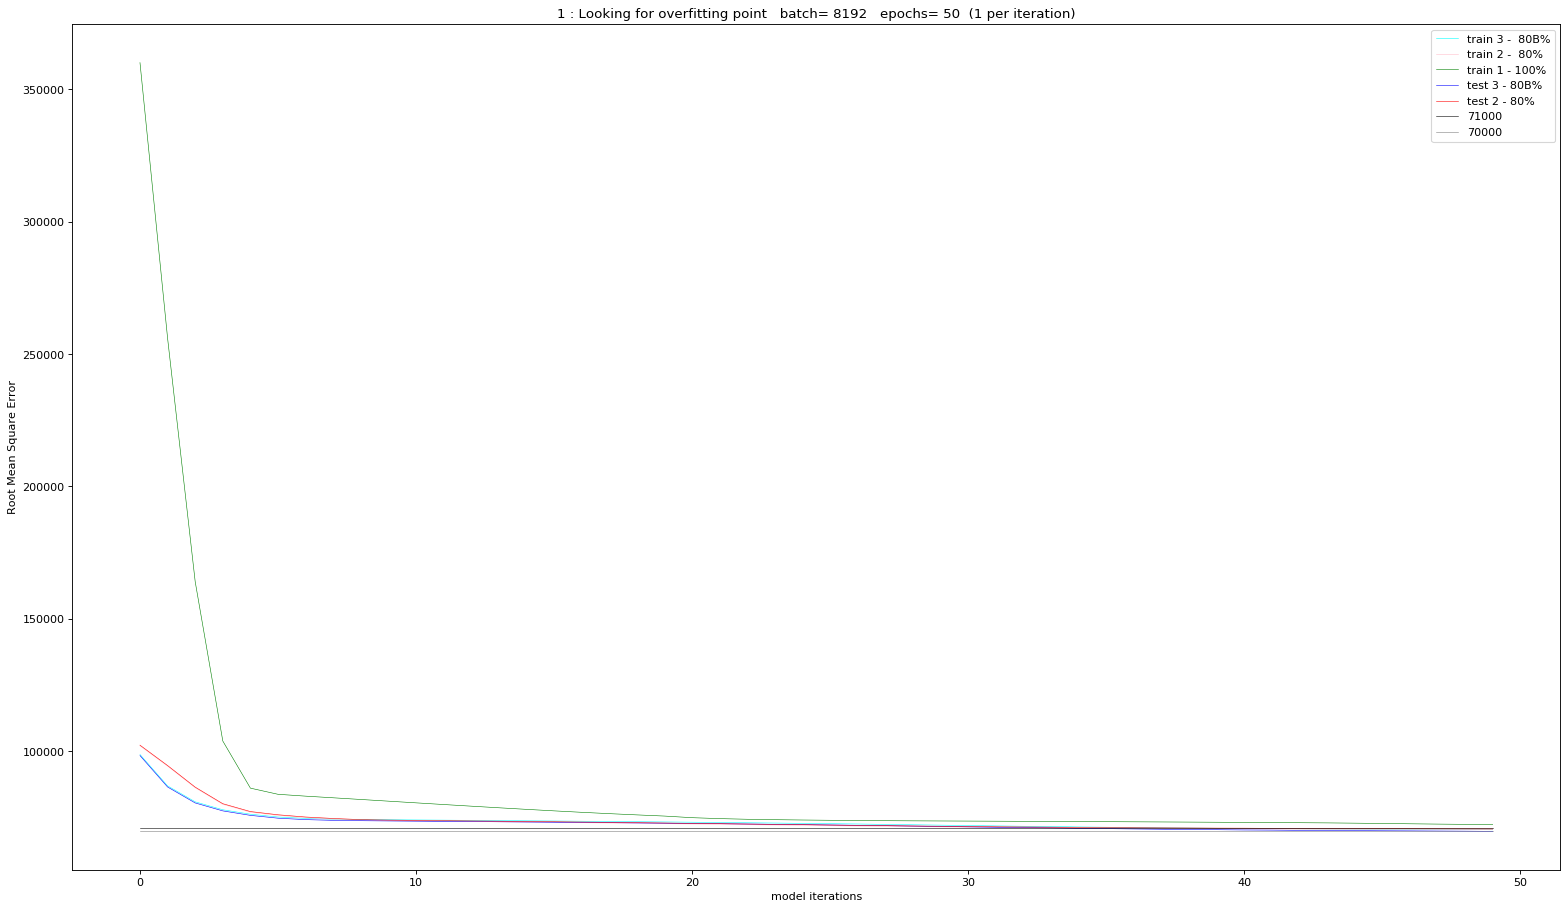

In [48]:
x = range(epcs)

hline1value = 71000
hline2value = 70000
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
plt.figure(figsize=(24,14), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='black', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.legend();
plt.title("1 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'Root Mean Square Error')

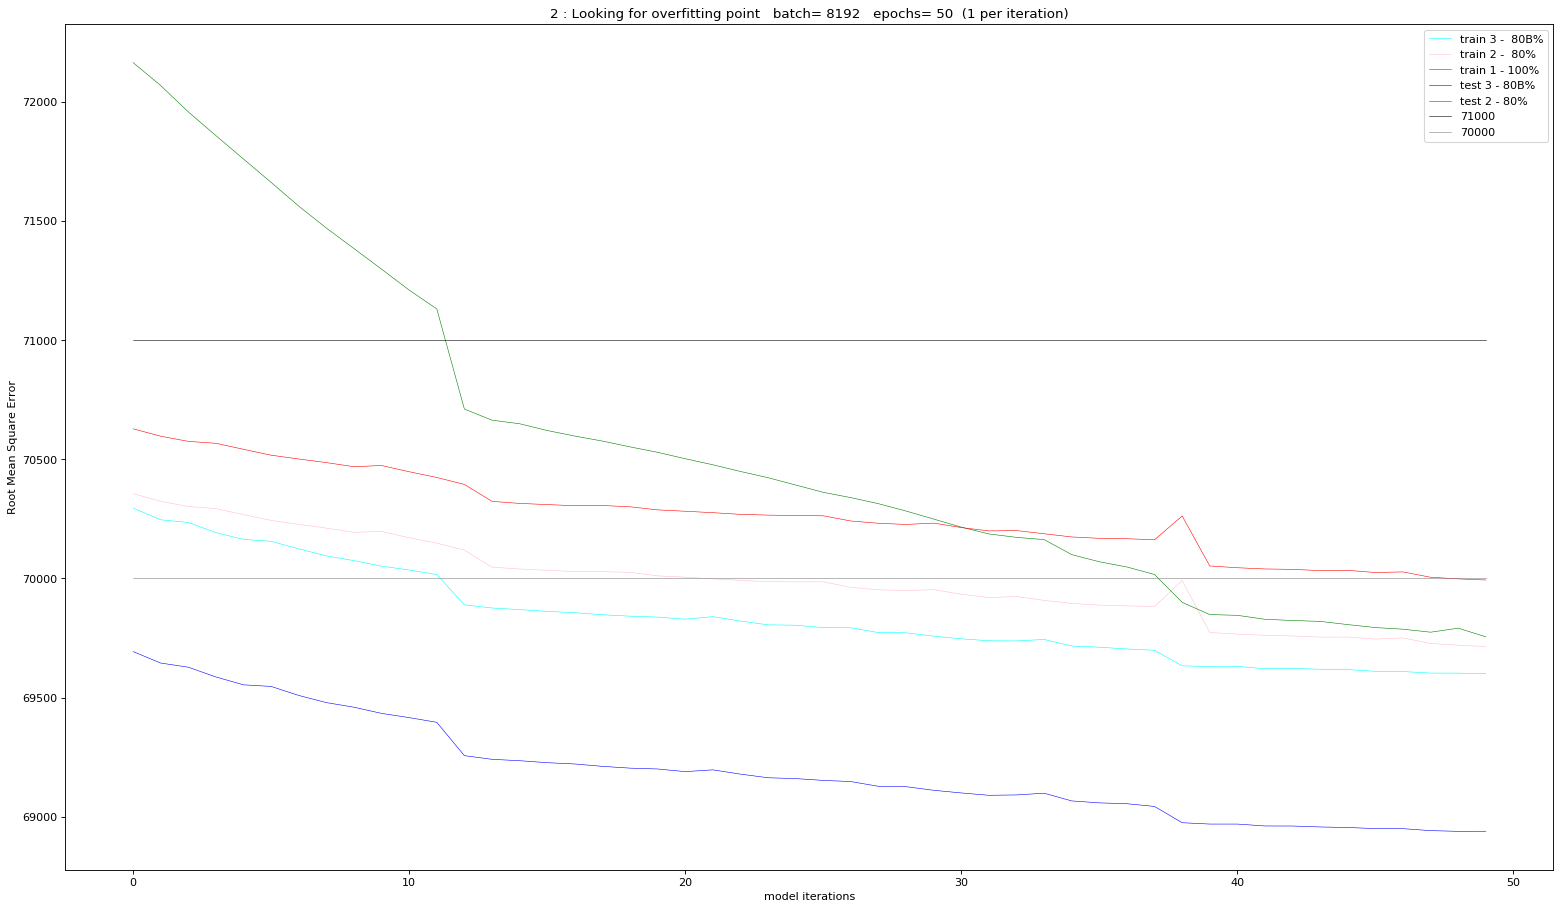

In [50]:
x = range(epcs)

hline1value = 71000
hline2value = 70000
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
plt.figure(figsize=(24,14), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='black', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.legend();
plt.title("2 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'Root Mean Square Error')

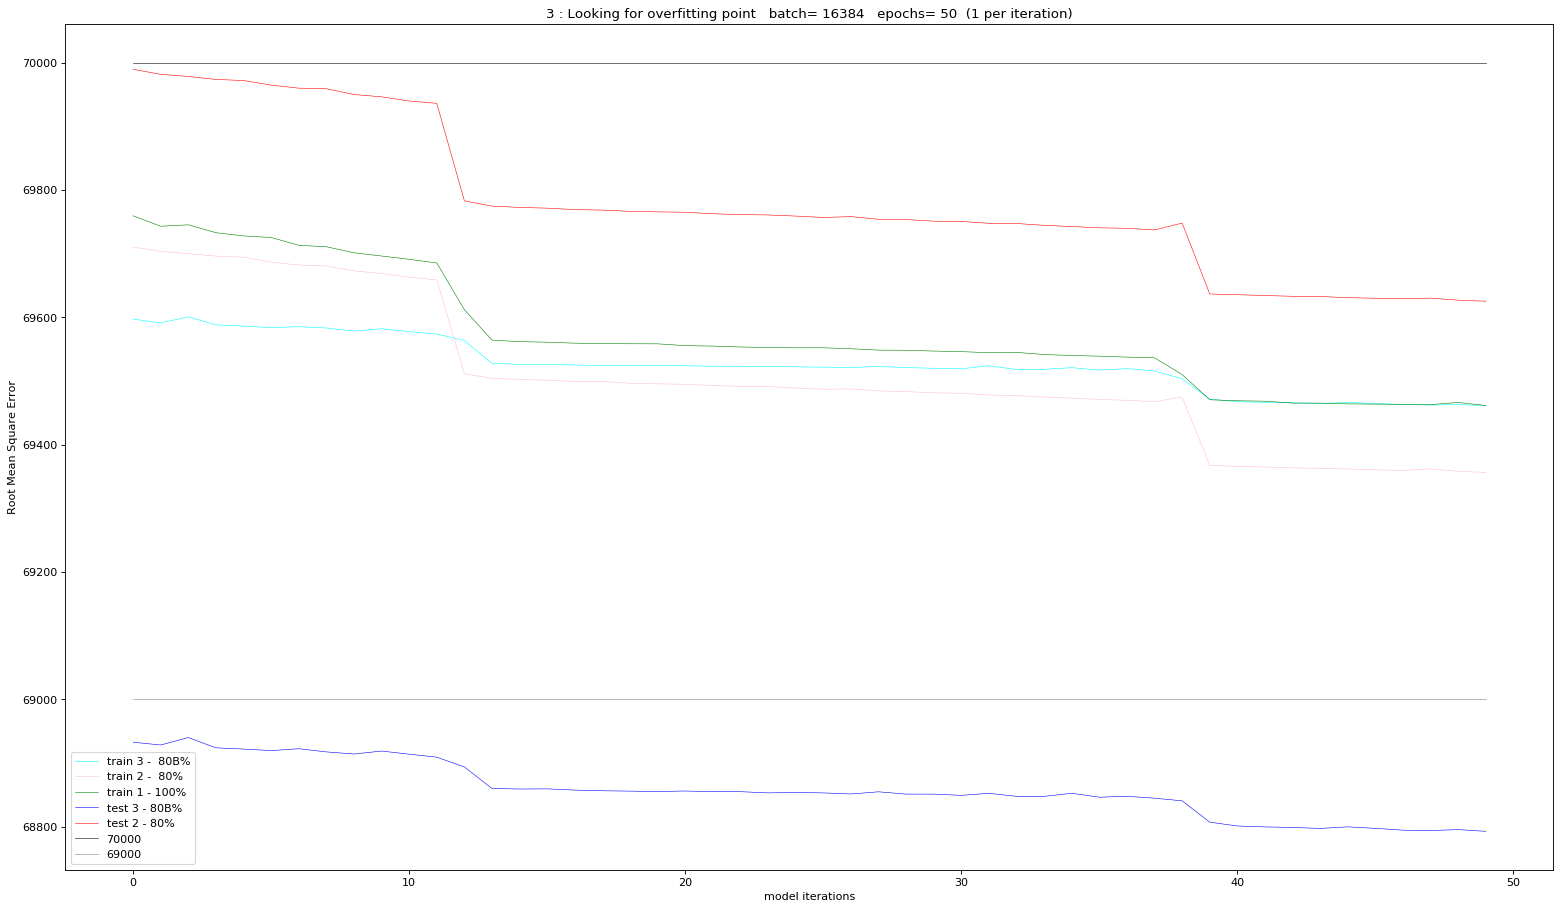

In [52]:
x = range(epcs)

hline1value = 70000
hline2value = 69000
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
plt.figure(figsize=(24,14), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='black', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.legend();
plt.title("3 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

In [0]:
x = range(epcs)

hline1value = 70000
hline2value = 69000
hline1 = np.zeros(epcs)
hline1 = hline1 + hline1value
hline2 = np.zeros(epcs)
hline2 = hline2 + hline2value
plt.figure(figsize=(24,14), dpi=80)  
plt.plot (x, rmsetrain3, color='cyan',  label="train 3 -  80B%",linewidth=0.5)
plt.plot (x, rmsetrain2, color='pink',  label="train 2 -  80%",linewidth=0.5)
plt.plot (x, rmsetrain1, color='green', label="train 1 - 100%",linewidth=0.5)
plt.plot (x, rmsetest3, color='blue',  label="test 3 - 80B%",linewidth=0.5)
plt.plot (x, rmsetest2, color='red',   label="test 2 - 80%",linewidth=0.5)
plt.plot (x, hline1, color='black', label = str(hline1value),linewidth=0.5)
plt.plot (x, hline2, color='grey', label = str(hline2value),linewidth=0.5)
plt.legend();
plt.title("4 : Looking for overfitting point   batch= " + str(bat_sz) + "   epochs= " + str(epcs*mini_epcs) + "  (" + str(mini_epcs) + " per iteration)")
plt.xlabel("model iterations")
plt.ylabel("Root Mean Square Error")

In [0]:
steps = [3,7]

for i in range (10) :
  print (i,)
  if i in steps :
    print (" This is a step.")
  else : 
    print (".")
    